# Project Overview

This dataset provides insights into customer satisfaction levels within an undisclosed airline company. The optimal goal is to examine the quality and satisfaction rates in this database.

The following are some questions to guide the analysis of this rich dataset:

**Questions to answer:**

1. Satisfaction:
    - Class -TMX
    - Entertainment - HYM
    - Distance - HYM
    - Delays
    - Food - TMX
  
Focus: during flight

# 1. Importing Dependencies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading the csv file

In [15]:
df = pd.read_csv(r"Airline_customer_satisfaction.csv")
df = df.sample(500)

# 3. EDA

In [16]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
73742,dissatisfied,Loyal Customer,23,Business travel,Business,2021,2,1,3,1,...,2,2,4,2,4,1,4,2,0,0.0
30615,satisfied,Loyal Customer,34,Personal Travel,Eco,1955,5,2,2,2,...,5,5,3,1,1,1,3,5,94,107.0
52256,dissatisfied,disloyal Customer,43,Business travel,Eco,3418,3,3,3,1,...,5,3,2,4,3,2,2,3,0,0.0
53163,dissatisfied,disloyal Customer,48,Business travel,Eco,3533,3,3,3,3,...,4,4,4,2,4,2,3,4,0,0.0
73914,dissatisfied,Loyal Customer,42,Business travel,Eco Plus,2599,2,5,3,5,...,2,2,1,4,3,3,3,2,0,21.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 73742 to 4402
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       500 non-null    object 
 1   Customer Type                      500 non-null    object 
 2   Age                                500 non-null    int64  
 3   Type of Travel                     500 non-null    object 
 4   Class                              500 non-null    object 
 5   Flight Distance                    500 non-null    int64  
 6   Seat comfort                       500 non-null    int64  
 7   Departure/Arrival time convenient  500 non-null    int64  
 8   Food and drink                     500 non-null    int64  
 9   Gate location                      500 non-null    int64  
 10  Inflight wifi service              500 non-null    int64  
 11  Inflight entertainment             500 non-null    int64  

In [18]:
df.shape

(500, 22)

In [19]:
df.describe().round()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,40.0,1963.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,13.0,15.0
std,15.0,1008.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0,34.0
min,7.0,53.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
25%,27.0,1392.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0
50%,41.0,1911.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0
75%,52.0,2467.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,9.0,14.0
max,80.0,5984.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,259.0,248.0


# 4. Data cleaning

In [20]:
# removing unwanted features
df.drop(["Departure/Arrival time convenient", 
         "Gate location", 
         "Online support", 
         "Ease of Online booking", 
         "On-board service", 
         "Baggage handling", 
         "Checkin service", 
         "Online boarding", 
         "Arrival Delay in Minutes"], 
        axis=1, inplace=True)

# Flight distance and satisfaction analysis

In [67]:
filtered_df = df[["satisfaction","Flight Distance"]].set_index("satisfaction")
filtered_df

,Flight Distance
satisfaction,
dissatisfied,2021
satisfied,1955
dissatisfied,3418
dissatisfied,3533
dissatisfied,2599
...,...
satisfied,1522
satisfied,1803
satisfied,319


In [23]:
df["Flight Distance"].dtype

dtype('int64')

In [24]:
df["Flight Distance"].value_counts()

Flight Distance
1724    3
2137    3
1360    2
1431    2
581     2
       ..
1836    1
2955    1
2302    1
1256    1
2334    1
Name: count, Length: 465, dtype: int64

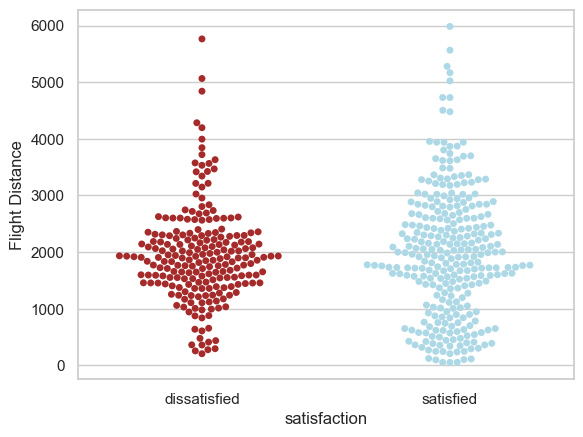

In [145]:
sns.set_style("whitegrid")
sns.swarmplot(data=df, y="Flight Distance", x="satisfaction", hue="satisfaction", palette={"dissatisfied": "Brown", "satisfied": "LightBlue"})
plt.show()

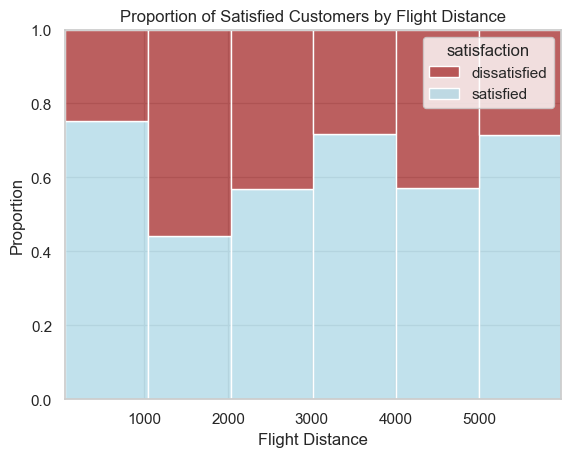

In [144]:
sns.set_style("whitegrid")
plot1 = sns.histplot(
    data = df,
    x="Flight Distance", 
    hue="satisfaction",
    multiple="fill",
    palette={"dissatisfied": "Brown", "satisfied": "LightBlue"},
    binwidth=1000,
)

plt.title("Proportion of Satisfied Customers by Flight Distance")
plot1.set_ylabel("Proportion")
plt.show()

# Enterntainment and satisfaction analysis

In [90]:
filtered_df = df[["satisfaction","Inflight entertainment"]]
filtered_df

,satisfaction,Inflight entertainment
73742,dissatisfied,2
30615,satisfied,5
52256,dissatisfied,3
53163,dissatisfied,3
73914,dissatisfied,2
...,...,...
4166,satisfied,0
12737,satisfied,4
19898,satisfied,4
33038,dissatisfied,4


<Figure size 1000x1000 with 0 Axes>

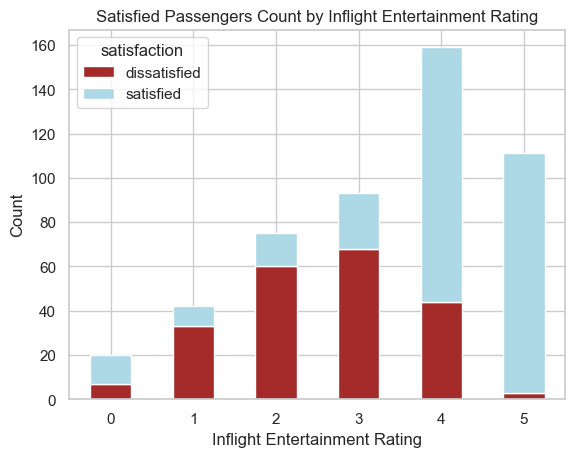

In [147]:
filtered_df = df.groupby(['Inflight entertainment', 'satisfaction']).size().unstack()
filtered_df


plt.figure(figsize=(10, 10))

filtered_df.plot(kind='bar', stacked=True, color=["Brown", "LightBlue"])

plt.title("Satisfied Passengers Count by Inflight Entertainment Rating")
plt.xlabel("Inflight Entertainment Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x1000 with 0 Axes>

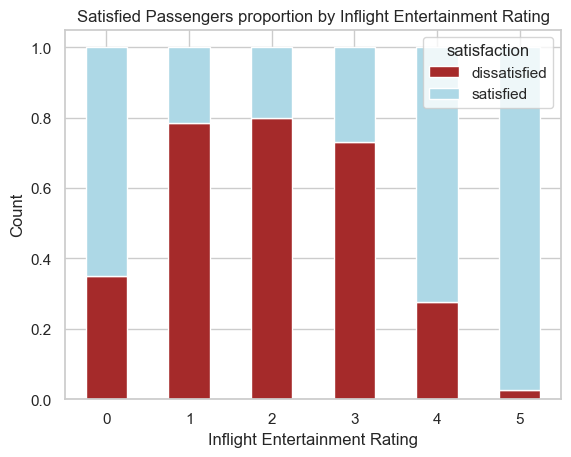

In [142]:
filtered_df = filtered_df.div(filtered_df.sum(axis=1), axis=0)

plt.figure(figsize=(10, 10))

filtered_df.plot(kind='bar', stacked=True, color=["Brown", "LightBlue"])

plt.title("Satisfied Passengers proportion by Inflight Entertainment Rating")
plt.xlabel("Inflight Entertainment Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()